In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset_sizes = ["small (M=20, N±=15)", "medium (M=200, N±=150)", "large (M=600, N±=450)"]
meta_params = ["C_I & C_HP", "D_I & C_HP", "C_I & D_HP", "D_I & D_HP"]

In [5]:
r_times = np.array([[6, 9, 6, 8.2], [121, 235, 141, 734], [np.nan, np.nan, np.nan, np.nan]])
py_cpu_times = np.array([[5, 15, 10, 7], [16, 168, 60, 781], [442, np.nan, np.nan, np.nan]])
py_gpu_times = np.array([[21, 23, 32, 30], [26, 86, 25, 85], [48, np.nan, 152, np.nan]])
py_tpu_times = np.array([[18, 23, 27, 24], [68, 242, 85, np.nan], [np.nan, np.nan, np.nan, np.nan]])

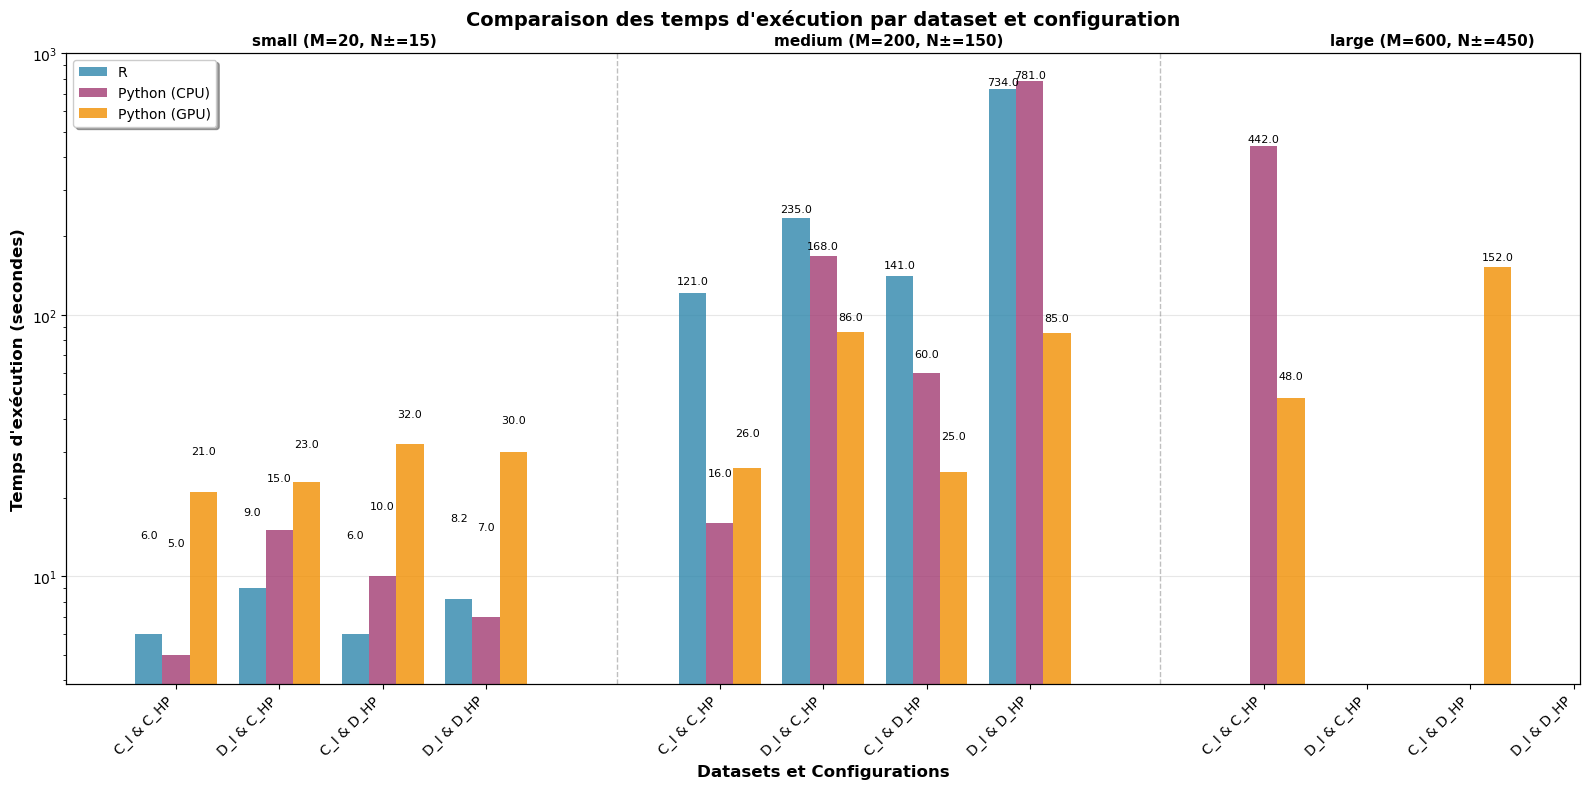

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))

# Paramètres pour le positionnement des barres
bar_width = 0.25
group_width = 4 * bar_width * 3 + 0.5  # 4 sous-groupes × 3 barres × largeur + espacement
group_spacing = 1.5

# Couleurs pour les 3 implémentations
colors = ['#2E86AB', '#A23B72', '#F18F01']
implementations = ['R', 'Python (CPU)', 'Python (GPU)', 'Python (TPU)']

# Positions des groupes principaux (datasets)
group_positions = np.arange(len(dataset_sizes)) * (group_width + group_spacing)

# Pour chaque dataset
for dataset_idx, dataset in enumerate(dataset_sizes):
    base_pos = group_positions[dataset_idx]

    # Pour chaque setup d'entraînement
    for setup_idx, setup in enumerate(meta_params):
        # Position de base pour ce sous-groupe
        subgroup_pos = base_pos + setup_idx * (3 * bar_width + 0.2)

        # Données pour ce setup
        r_val = r_times[dataset_idx, setup_idx]
        cpu_val = py_cpu_times[dataset_idx, setup_idx]
        gpu_val = py_gpu_times[dataset_idx, setup_idx]
        tpu_val = py_tpu_times[dataset_idx, setup_idx]

        values = [r_val, cpu_val, gpu_val, tpu_val]

        # Dessiner les 3 barres côte à côte
        for impl_idx, (value, color, label) in enumerate(zip(values, colors, implementations)):
            pos = subgroup_pos + impl_idx * bar_width

            if not np.isnan(value):
                bar = ax.bar(pos, value, bar_width, color=color, alpha=0.8,
                           label=label if dataset_idx == 0 and setup_idx == 0 else "")

                # Ajouter la valeur au-dessus de la barre
                ax.text(pos, value + max(np.nanmax(r_times), np.nanmax(py_cpu_times),
                                       np.nanmax(py_gpu_times)) * 0.01,
                       f'{value:.1f}', ha='center', va='bottom', fontsize=8)

# Positions pour les labels des sous-groupes
setup_positions = []
for dataset_idx in range(len(dataset_sizes)):
    base_pos = group_positions[dataset_idx]
    for setup_idx in range(len(meta_params)):
        subgroup_center = base_pos + setup_idx * (3 * bar_width + 0.2) + bar_width
        setup_positions.append(subgroup_center)

# Positions pour les labels des datasets (groupes principaux)
dataset_positions = []
for dataset_idx in range(len(dataset_sizes)):
    base_pos = group_positions[dataset_idx]
    center = base_pos + (len(meta_params) * (3 * bar_width + 0.2) - 0.2) / 2
    dataset_positions.append(center)

# Configuration des axes
ax.set_xlabel('Datasets et Configurations', fontsize=12, fontweight='bold')
ax.set_ylabel('Temps d\'exécution (secondes)', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des temps d\'exécution par dataset et configuration',
             fontsize=14, fontweight='bold', pad=20)

# Échelle logarithmique pour mieux voir les différences
#ax.set_yscale('log')

# Grille
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

# Légende
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Labels des datasets (groupes principaux)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(dataset_positions)
ax2.set_xticklabels(dataset_sizes, fontweight='bold', fontsize=11)
ax2.tick_params(axis='x', length=0)

# Labels des setups (sous-groupes)
setup_labels_repeated = meta_params * len(dataset_sizes)
ax.set_xticks(setup_positions)
ax.set_xticklabels(setup_labels_repeated, rotation=45, ha='right', fontsize=10)

# Lignes de séparation entre les datasets
for i in range(1, len(dataset_sizes)):
    separator_pos = (dataset_positions[i-1] + dataset_positions[i]) / 2
    ax.axvline(x=separator_pos, color='gray', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()